### En este trabajo se han utilizado extractos de las notebooks de clases pasadas del curso ClusterAI 2020

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn import preprocessing

In [2]:
#SK-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import GridSearchCV
#Scalers
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Modelos Lineales
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
### usar los datos de entrenamiento (training dataset) para entrenar un modelo de regresión 
### y predecir los valores para un nuevo set de inputs (test dataset)


In [3]:
#abro los archivos a utilizar
X_test = pd.read_csv("./X_test.csv") #los usare mas adelante cuando ya tenga el mejor modelo elegido (notar que no tienen los valores de y)
xy_train = pd.read_csv("./Xy_train.csv") #uso los datos de train como si fuese mi dataset completo y los uso para entrenar y elegir el mejor modelo

In [4]:
X_test

,X
0,6.170800
1,6.302022
2,8.689293
3,2.376897
4,2.707320
5,6.555949
6,8.492565
7,0.111064
8,9.121449
9,2.675377


In [86]:
np.shape(X_test)

(20, 1)

In [5]:
xy_train

,X,y
0,2.273360,6.054685
1,3.167583,4.581428
2,7.973655,5.392507
3,6.762547,3.108068
4,3.911096,4.225744
...,...,...
95,3.787495,5.133706
96,2.759471,4.308327
97,9.661041,11.923565
98,0.582026,1.335725


In [6]:
#separa x_train y y_train
X_train =  np.array(xy_train[["X"]])
Y_train =  np.array(xy_train[["y"]])

In [7]:
np.shape(X_train)

(100, 1)

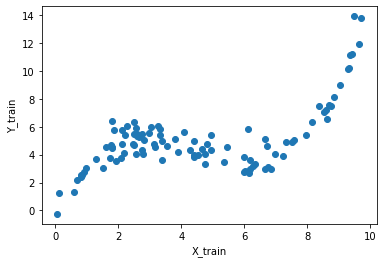

In [8]:
#visualizo mi dataset
plt.scatter(X_train, Y_train)
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.show()

## Split Train and Test Set

In [9]:
#Divido el dataset entre Train y Test
x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train, test_size=0.3, random_state=1)
# Separamos el set X con las features polinomicas (el set Y ya fue separado en la linea anterior) 
x_poly_train, x_poly_test = train_test_split(X_train, test_size=0.3, random_state=1)

In [10]:
np.shape(x_train)

(70, 1)

In [11]:
np.shape(y_train)

(70, 1)

In [12]:
# Vamos a crear un dataframe para guardar los resultados de cada estimador
results_df = pd.DataFrame(columns=['Model','Features','R2','MSE','MAE'])
results_df

,Model,Features,R2,MSE,MAE


## LINEAR REGRESSION 

### Datos originales (sin escalar)

In [13]:
#creo un modelo generico de regresion lineal
lr = LinearRegression()

In [14]:
#Entrenamos al modelo
#Ajusto el modelo de regresion lineal utilizando el set de train, tanto las features X como las samples Y
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
# Usamos x_test para predecir con el mejor estimador -> ypred
ypred = lr.predict(x_test)

In [16]:
np.shape(ypred)

(30, 1)

In [ ]:
# calculo el error de mi modelo con las muestras de train = error de train
#np.sqrt(mean_squared_error(ypred, Ypred))

In [17]:
#Calculamos las metricas R2, MSE y MAE
linear_r2 = r2_score(y_true=y_test, y_pred=ypred)
linear_mse = mean_squared_error(y_true=y_test, y_pred=ypred)
linear_mae = mean_absolute_error(y_true=y_test, y_pred=ypred)

R2 score: 0.383186
MAE: 1.679251
MSE: 4.779281


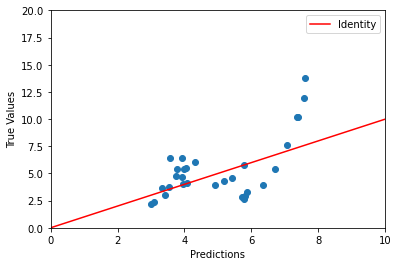

In [18]:
#Vamos a plotear Predictions vs True values
plt.scatter(ypred, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((0,10))
plt.ylim((0,20))
plt.legend()
print(f'R2 score: {linear_r2:.6f}')
print(f'MAE: {linear_mae:.6f}')
print(f'MSE: {linear_mse:.6f}')

In [19]:
#Guardamos los resultados
results_df = results_df.append({'Model':'Linear',
                                'Features':'-',
                                'R2':linear_r2,
                                'MSE':linear_mse,
                                'MAE':linear_mae},ignore_index=True)

In [20]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,-,0.383186,4.779281,1.679251


## SCALER

In [21]:
# Definimos el escalador 
# # auto scaling train- set (mean = 0, std = 1)
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(x_train) # Fiteamos para los x_train
scaler

# MIN-MAX SCALER
# scaler = MinMaxScaler() # Pueden probar con otros
# scaler = scaler.fit(x_train)# Fiteamos para los x_train
# scaler

StandardScaler()

In [22]:
# Transformamos los x_train y x_test
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Aqui estamos agregando las features polinomicas LUEGO de escalar los datos
grad_poly = 3
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_train_scaled)
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_test_scaled)

In [23]:
x_test_scaled.shape

(30, 1)

In [24]:
x_train_scaled.shape

(70, 1)

In [25]:
x_train_poly_scaled.shape

(70, 4)

## LINEAR REGRESSION 

### Linear Features

In [26]:
#Definimos el estimador
est = LinearRegression()
#Definimos diccionario con hyperparametros
parameters = {'fit_intercept' : [False, True]}
#Definimos la cantidad de folds para validar
n_folds = 5
#Definimos el objeto grid search con los parametros anteriores
gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, refit=True, scoring="neg_mean_squared_error")

In [28]:
#Entrenamos
gs.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [False, True]},
             scoring='neg_mean_squared_error')

In [29]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression() 

{'fit_intercept': True} 

-3.141792077997614 



In [30]:
# Usamos x_test (del train- test split) para predecir con el mejor estimador
linear_prediction = gs.best_estimator_.predict(x_test_scaled)

In [31]:
#Calculamos las metricas R2, MSE y MAE
lineal_linear_r2 = r2_score(y_true=y_test, y_pred=linear_prediction)
lineal_linear_mse = mean_squared_error(y_true=y_test, y_pred=linear_prediction)
lineal_linear_mae = mean_absolute_error(y_true=y_test, y_pred=linear_prediction)

R2 score: 0.383186
MAE: 1.679251
MSE: 4.779281


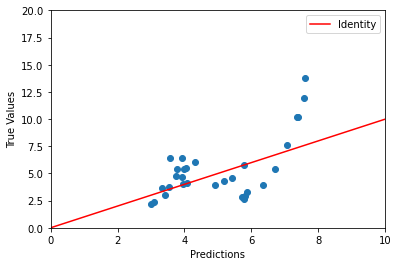

In [32]:
#Vamos a plotear Predictions vs True values
plt.scatter(linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((0,10))
plt.ylim((0,20))
plt.legend()
print(f'R2 score: {lineal_linear_r2:.6f}')
print(f'MAE: {lineal_linear_mae:.6f}')
print(f'MSE: {lineal_linear_mse:.6f}')


In [33]:
#Guardamos los resultados
results_df = results_df.append({'Model':'Linear',
                                'Features':'Linear',
                                'R2':lineal_linear_r2,
                                'MSE':lineal_linear_mse,
                                'MAE':lineal_linear_mae},ignore_index=True)


In [34]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,-,0.383186,4.779281,1.679251
1,Linear,Linear,0.383186,4.779281,1.679251


### Polynomial Features

Ahora vamos a usar los mismos parametros, pero vamos a entrenar con el set de features polinomicas.
Este mismo proceso lo vamos a repetir para los otros estimadores

In [35]:
#Usamos los mismos parametros para este nuevo GS.
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
#Entrenamos
gs.fit(x_train_poly_scaled, y_train)
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression(fit_intercept=False) 

{'fit_intercept': False} 

-0.5712700995317975 



In [36]:
# Predecimos para el set polinomico
poly_linear_prediction = gs.best_estimator_.predict(x_test_poly_scaled)

# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test , y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test , y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test , y_pred=poly_linear_prediction)

R2 score: 0.909096
MAE: 0.682274
MSE: 0.704351


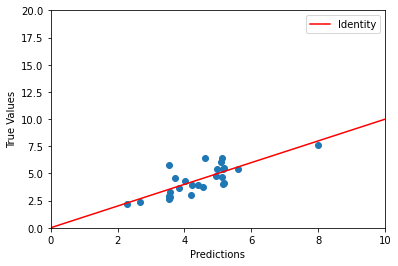

In [37]:
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((0,10))
plt.ylim((0,20))
plt.legend()
print(f'R2 score: {poly_linear_r2:.6f}')
print(f'MAE: {poly_linear_mae:.6f}')
print(f'MSE: {poly_linear_mse:.6f}')

In [38]:
results_df = results_df.append({'Model':'Linear',
                                'Features':'Poly',
                                'R2':poly_linear_r2,
                                'MSE':poly_linear_mse,
                                'MAE':poly_linear_mae},ignore_index=True)

In [39]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,-,0.383186,4.779281,1.679251
1,Linear,Linear,0.383186,4.779281,1.679251
2,Linear,Poly,0.909096,0.704351,0.682274


# Support Vector Regression


In [40]:
# Ahora cambiamos el estimador, usaremos SVR
est = SVR(max_iter=25000)
# Lista del parametro lambda (parametro 'alpha')
parameters = {'C' : [1000,1500,2000,3000,5000],
              'epsilon' : [0.001, 0.01, 0.1,1, 10,100],
             'gamma':[0.001, 0.01, 0.1,1, 10,100]}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

### Datos originales (sin escalar)

In [41]:
# Entrenamos
gs.fit(x_train, y_train)
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  40 tasks      | elapsed:    0.5s


SVR(C=1500, gamma=0.1, max_iter=25000) 

{'C': 1500, 'epsilon': 0.1, 'gamma': 0.1} 

-0.6060680268170617 



[Parallel(n_jobs=3)]: Done 900 out of 900 | elapsed:    1.3s finished
D:\Python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [42]:
# Prediccion + Metricas
svr_prediction = gs.best_estimator_.predict(x_test)
svr_r2 = r2_score(y_true=y_test, y_pred=svr_prediction)
svr_mse = mean_squared_error(y_true=y_test, y_pred=svr_prediction)
svr_mae = mean_absolute_error(y_true=y_test, y_pred=svr_prediction)

R2 score: 0.905745
MAE: 0.653486
MSE: 0.730318


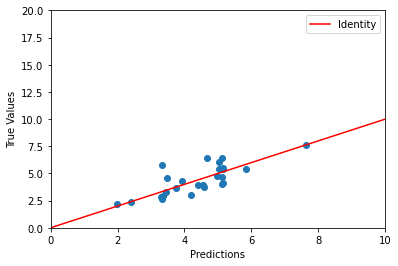

In [43]:
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(svr_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((0,10))
plt.ylim((0,20))
plt.legend()
print(f'R2 score: {svr_r2:.6f}')
print(f'MAE: {svr_mae:.6f}')
print(f'MSE: {svr_mse:.6f}')

In [44]:
results_df = results_df.append({'Model':'SVR',
                                'Features':'-',
                                'R2':svr_r2,
                                'MSE':svr_mse,
                                'MAE':svr_mae},ignore_index=True)

In [45]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,-,0.383186,4.779281,1.679251
1,Linear,Linear,0.383186,4.779281,1.679251
2,Linear,Poly,0.909096,0.704351,0.682274
3,SVR,-,0.905745,0.730318,0.653486


### Linear Features (datos escalados)

In [46]:
# Entrenamos con linear features ESCALADAS!
gs.fit(x_train_scaled, y_train)
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 130 tasks      | elapsed:    0.0s


SVR(C=2000, gamma=1, max_iter=25000) 

{'C': 2000, 'epsilon': 0.1, 'gamma': 1} 

-0.6269742036481929 



[Parallel(n_jobs=3)]: Done 900 out of 900 | elapsed:    0.7s finished
D:\Python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Python\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [47]:
# Prediccion + Metricas
svr_linear_prediction = gs.best_estimator_.predict(x_test_scaled)

svr_linear_r2 = r2_score(y_true=y_test, y_pred=svr_linear_prediction)
svr_linear_mse = mean_squared_error(y_true=y_test, y_pred=svr_linear_prediction)
svr_linear_mae = mean_absolute_error(y_true=y_test, y_pred=svr_linear_prediction)

R2 score: 0.898711
MAE: 0.669248
MSE: 0.784821


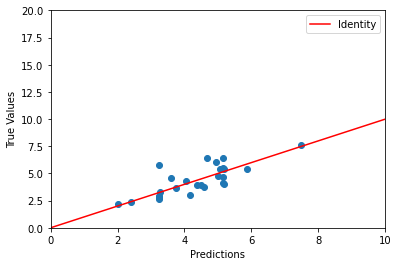

In [48]:
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(svr_linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((0,10))
plt.ylim((0,20))
plt.legend()
print(f'R2 score: {svr_linear_r2:.6f}')
print(f'MAE: {svr_linear_mae:.6f}')
print(f'MSE: {svr_linear_mse:.6f}')

In [49]:
results_df = results_df.append({'Model':'SVR',
                                'Features':'Linear',
                                'R2':svr_r2,
                                'MSE':svr_mse,
                                'MAE':svr_mae},ignore_index=True)

In [50]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,-,0.383186,4.779281,1.679251
1,Linear,Linear,0.383186,4.779281,1.679251
2,Linear,Poly,0.909096,0.704351,0.682274
3,SVR,-,0.905745,0.730318,0.653486
4,SVR,Linear,0.905745,0.730318,0.653486


### Features Polinomicas (con datos escalados)

In [51]:
gs.fit(x_train_poly_scaled, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 900 out of 900 | elapsed:    0.7s finished
D:\Python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5, estimator=SVR(max_iter=25000), n_jobs=3,
             param_grid={'C': [1000, 1500, 2000, 3000, 5000],
                         'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=3)

In [52]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=5000, epsilon=0.001, gamma=0.01, max_iter=25000) 

{'C': 5000, 'epsilon': 0.001, 'gamma': 0.01} 

-0.5742911322757023 



In [53]:
# Prediccion + Metricas
poly_svr_prediction = gs.best_estimator_.predict(x_test_poly_scaled)

poly_svr_r2 = r2_score(y_true=y_test, y_pred=poly_svr_prediction)
poly_svr_mse = mean_squared_error(y_true=y_test, y_pred=poly_svr_prediction)
poly_svr_mae = mean_absolute_error(y_true=y_test, y_pred=poly_svr_prediction)

R2 score: 0.876809
MAE: 0.740362
MSE: 0.954525


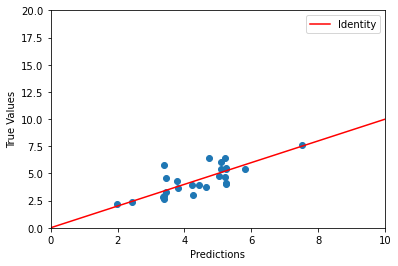

In [54]:
#Plot
plt.scatter(poly_svr_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((0,10))
plt.ylim((0,20))
plt.legend()
print(f'R2 score: {poly_svr_r2:.6f}')
print(f'MAE: {poly_svr_mae:.6f}')
print(f'MSE: {poly_svr_mse:.6f}')

In [55]:
#Guardamos
results_df = results_df.append({'Model':'SVR',
                                'Features':'Poly',
                                'R2':poly_svr_r2,
                                'MSE':poly_svr_mse,
                                'MAE':poly_svr_mae},ignore_index=True)

In [56]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,-,0.383186,4.779281,1.679251
1,Linear,Linear,0.383186,4.779281,1.679251
2,Linear,Poly,0.909096,0.704351,0.682274
3,SVR,-,0.905745,0.730318,0.653486
4,SVR,Linear,0.905745,0.730318,0.653486
5,SVR,Poly,0.876809,0.954525,0.740362


# Ridge Regression



In [57]:
# Ahora cambiamos el estimador, usaremos Ridge Regression
est = Ridge()
# Lista del parametro lambda (llamado 'alpha' en el GridSearch )
lambdas = [0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,1]
# Juntamos el diccionario de parametros
parameters = {'alpha': lambdas}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")

### Datos originales (sin escalar)

In [58]:
gs.fit(x_train, y_train)
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

Ridge(alpha=1) 

{'alpha': 1} 

-3.141758975429506 



In [59]:
# Prediccion + Metricas
ridge_prediction = gs.best_estimator_.predict(x_test)
ridge_r2 = r2_score(y_true=y_test, y_pred=ridge_prediction)
ridge_mse = mean_squared_error(y_true=y_test, y_pred=ridge_prediction)
ridge_mae = mean_absolute_error(y_true=y_test, y_pred=ridge_prediction)

R2 score: 0.382917
MAE: 1.679236
MSE: 4.781367


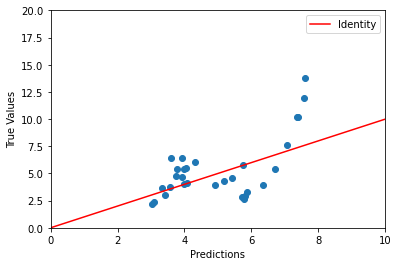

In [60]:
# Plots
plt.scatter(ridge_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((0,10))
plt.ylim((0,20))
plt.legend()
print(f'R2 score: {ridge_r2:.6f}')
print(f'MAE: {ridge_mae:.6f}')
print(f'MSE: {ridge_mse:.6f}')

In [61]:
#Guardamos resultados
results_df = results_df.append({'Model':'Ridge',
                                'Features':'-',
                                'R2':ridge_r2,
                                'MSE':ridge_mse,
                                'MAE':ridge_mae},ignore_index=True)

In [62]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,-,0.383186,4.779281,1.679251
1,Linear,Linear,0.383186,4.779281,1.679251
2,Linear,Poly,0.909096,0.704351,0.682274
3,SVR,-,0.905745,0.730318,0.653486
4,SVR,Linear,0.905745,0.730318,0.653486
5,SVR,Poly,0.876809,0.954525,0.740362
6,Ridge,-,0.382917,4.781367,1.679236


### Linear Features (datos escalados)

In [63]:
# Entrenamos (con datos escalados)
gs.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 1]},
             scoring='neg_mean_squared_error')

In [64]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

Ridge(alpha=0.3) 

{'alpha': 0.3} 

-3.1417498331217537 



In [65]:
#Predicciones + Metricas
ridge_linear_prediction = gs.best_estimator_.predict(x_test_scaled)
ridge_linear_r2 = r2_score(y_true=y_test, y_pred=ridge_linear_prediction)
ridge_linear_mse = mean_squared_error(y_true=y_test, y_pred=ridge_linear_prediction)
ridge_linear_mae = mean_absolute_error(y_true=y_test, y_pred=ridge_linear_prediction)

R2 score: 0.382618
MAE: 1.679219
MSE: 4.783685


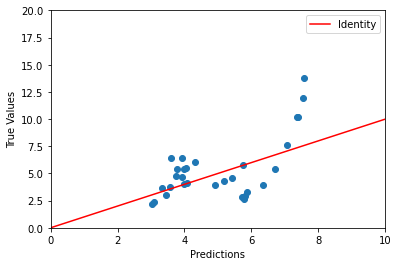

In [66]:
# Plots 
plt.scatter(ridge_linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((0,10))
plt.ylim((0,20))
plt.legend()
print(f'R2 score: {ridge_linear_r2:.6f}')
print(f'MAE: {ridge_linear_mae:.6f}')
print(f'MSE: {ridge_linear_mse:.6f}')

In [67]:
#Guardamos resultados
results_df = results_df.append({'Model':'Ridge',
                                'Features':'Linear',
                                'R2':ridge_linear_r2,
                                'MSE':ridge_linear_mse,
                                'MAE':ridge_linear_mae},ignore_index=True)

In [68]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,-,0.383186,4.779281,1.679251
1,Linear,Linear,0.383186,4.779281,1.679251
2,Linear,Poly,0.909096,0.704351,0.682274
3,SVR,-,0.905745,0.730318,0.653486
4,SVR,Linear,0.905745,0.730318,0.653486
5,SVR,Poly,0.876809,0.954525,0.740362
6,Ridge,-,0.382917,4.781367,1.679236
7,Ridge,Linear,0.382618,4.783685,1.679219


### Features Polinomicas (con datos escalados)

In [69]:
#Definimos estimador
est = Ridge()
#Defini
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
gs.fit(x_train_poly_scaled, y_train)
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

Ridge(alpha=0.3) 

{'alpha': 0.3} 

-0.5699341455228916 



In [70]:
# Prediccion + Metricas
poly_ridge_prediction = gs.best_estimator_.predict(x_test_poly_scaled)

poly_ridge_r2 = r2_score(y_true=y_test, y_pred=poly_ridge_prediction)
poly_ridge_mse = mean_squared_error(y_true=y_test, y_pred=poly_ridge_prediction)
poly_ridge_mae = mean_absolute_error(y_true=y_test, y_pred=poly_ridge_prediction)

R2 score: 0.909576
MAE: 0.685456
MSE: 0.700637


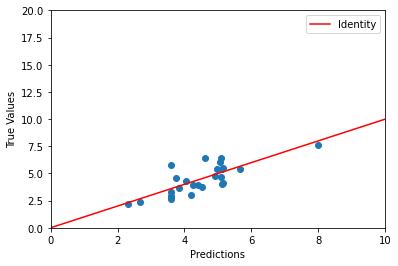

In [71]:
# Plots
plt.scatter(poly_ridge_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((0,10))
plt.ylim((0,20))
plt.legend()
print(f'R2 score: {poly_ridge_r2:.6f}')
print(f'MAE: {poly_ridge_mae:.6f}')
print(f'MSE: {poly_ridge_mse:.6f}')

In [72]:
# Guardamos
results_df = results_df.append({'Model':'Ridge',
                                'Features':'Poly',
                                'R2':poly_ridge_r2,
                                'MSE':poly_ridge_mse,
                                'MAE':poly_ridge_mae},ignore_index=True)

In [73]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,-,0.383186,4.779281,1.679251
1,Linear,Linear,0.383186,4.779281,1.679251
2,Linear,Poly,0.909096,0.704351,0.682274
3,SVR,-,0.905745,0.730318,0.653486
4,SVR,Linear,0.905745,0.730318,0.653486
5,SVR,Poly,0.876809,0.954525,0.740362
6,Ridge,-,0.382917,4.781367,1.679236
7,Ridge,Linear,0.382618,4.783685,1.679219
8,Ridge,Poly,0.909576,0.700637,0.685456


## Fiteo a mi mejor modelo con los datos completos de Xy_train.csv y luego calculo las Y_test

#### Elijo el modelo Ridge Regression con features polinomicas escaladas!

In [134]:
#Definimos estimador
est = Ridge()
#Defini
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")

gs.fit(X_train_poly_scaled, Y_train)

print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

Ridge(alpha=0.3) 

{'alpha': 0.3} 

-0.5805056665049971 



In [135]:
#escalo los datos de x_train para ingresarlos en el modelo
# Definimos el escalador 
# # auto scaling train- set (mean = 0, std = 1)
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(X_train) # Fiteamos para los X_train
scaler


StandardScaler()

In [136]:
# Transformamos los x_train y x_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aqui estamos agregando las features polinomicas LUEGO de escalar los datos
grad_poly = 3
X_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(X_train_scaled)
X_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(X_test_scaled)

In [138]:
# Prediccion con todos los datos de X_test.csv
poly_ridge_prediction_final = gs.best_estimator_.predict(X_test_poly_scaled)
poly_ridge_prediction_final

array([[3.59794376],
       [3.60840019],
       [7.81627344],
       [5.05385621],
       [5.15048238],
       [3.67580301],
       [7.09433922],
       [0.1358571 ],
       [9.70554027],
       [5.14590734],
       [5.098214  ],
       [3.63069563],
       [9.88926444],
       [2.17615455],
       [4.24837085],
       [5.91702849],
       [4.05785007],
       [3.60511342],
       [4.11877794],
       [3.60552595]])

In [139]:
poly_ridge_prediction_final=np.array(poly_ridge_prediction_final)
poly_ridge_prediction_final = poly_ridge_prediction_final.reshape(1,-1)
poly_ridge_prediction_final = np.around(np.array(Y_test),decimals=2)
poly_ridge_prediction_final

array([[3.6 , 3.61, 7.82, 5.05, 5.15, 3.68, 7.09, 0.14, 9.71, 5.15, 5.1 ,
        3.63, 9.89, 2.18, 4.25, 5.92, 4.06, 3.61, 4.12, 3.61]])

In [140]:
#Paso los datos al formato requerido
Y_test = poly_ridge_prediction_final.tolist()
print(Y_test)

[[3.6, 3.61, 7.82, 5.05, 5.15, 3.68, 7.09, 0.14, 9.71, 5.15, 5.1, 3.63, 9.89, 2.18, 4.25, 5.92, 4.06, 3.61, 4.12, 3.61]]
